In [1]:
import pandas as pd #for manipulating Rows and columns is datafrme
import numpy as np #for calculation in matrix
import matplotlib.pyplot as plt #for plotting graph
import seaborn as sns #for plotting bargraphs
from sklearn.metrics import accuracy_score

In [2]:
#Storing data into variables
def read_csv(filename):
    lines = csv.reader(open(filename, "rb"))
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
        return dataset

MyData = pd.read_csv("Anomaly_detection.csv")
print (MyData)

                                                    hash  millisecond  state  \
0      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            0      0   
1      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            1      0   
2      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            2      0   
3      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            3      0   
4      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            4      0   
5      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            5      0   
6      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            6      0   
7      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            7      0   
8      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            8      0   
9      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            9      0   
10     42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...           10      0   
11     42fb5e2ec009a05ff5143227297074f1e

In [3]:
#Fetching first 5 rows
MyData.head()

,hash,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,...,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw,classification
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,0,0,3069378560,14274,0,0,0,13173,...,0,120,0,3204448256,380690,4,0,0,0,Anomaly
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,0,0,3069378560,14274,0,0,0,13173,...,0,120,0,3204448256,380690,4,0,0,0,Anomaly
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,0,0,3069378560,14274,0,0,0,13173,...,0,120,0,3204448256,380690,4,0,0,0,Anomaly
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,0,0,3069378560,14274,0,0,0,13173,...,0,120,0,3204448256,380690,4,0,0,0,Anomaly
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,0,0,3069378560,14274,0,0,0,13173,...,0,120,0,3204448256,380690,4,0,0,0,Anomaly


In [4]:
#fetching last 5 rows
MyData.tail()

,hash,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,...,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw,classification
39072,com.jrtstudio.music.apk,72,0,0,3069460480,14109,0,0,0,14131,...,1,120,1,3204448256,376168,3,1,0,0,Normal
39073,com.jrtstudio.music.apk,73,0,0,3069460480,14109,0,0,0,14131,...,1,120,1,3204448256,376427,3,1,0,0,Normal
39074,com.jrtstudio.music.apk,74,0,0,3069460480,14109,0,0,0,14174,...,1,120,2,3204448256,376168,3,12,0,0,Normal
39075,com.jrtstudio.music.apk,75,0,0,3069460480,14109,0,0,0,14174,...,1,120,2,3204448256,376168,3,12,0,0,Normal
39076,com.jrtstudio.music.apk,76,0,0,3069460480,14109,0,0,0,14174,...,1,120,2,3204448256,376435,3,12,0,0,Normal


In [5]:
#finding no. of rows and columns of a dataframe
MyData.shape

(39077, 35)

In [6]:
MyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39077 entries, 0 to 39076
Data columns (total 35 columns):
hash                 39077 non-null object
millisecond          39077 non-null int64
state                39077 non-null int64
usage_counter        39077 non-null int64
prio                 39077 non-null int64
static_prio          39077 non-null int64
normal_prio          39077 non-null int64
policy               39077 non-null int64
vm_pgoff             39077 non-null int64
vm_truncate_count    39077 non-null int64
task_size            39077 non-null int64
cached_hole_size     39077 non-null int64
free_area_cache      39077 non-null int64
mm_users             39077 non-null int64
map_count            39077 non-null int64
hiwater_rss          39077 non-null int64
total_vm             39077 non-null int64
shared_vm            39077 non-null int64
exec_vm              39077 non-null int64
reserved_vm          39077 non-null int64
nr_ptes              39077 non-null int64
end_data

In [7]:
#finding list of attributes present in our table
MyData.columns

Index(['hash', 'millisecond', 'state', 'usage_counter', 'prio', 'static_prio',
       'normal_prio', 'policy', 'vm_pgoff', 'vm_truncate_count', 'task_size',
       'cached_hole_size', 'free_area_cache', 'mm_users', 'map_count',
       'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm',
       'nr_ptes', 'end_data', 'last_interval', 'nvcsw', 'nivcsw', 'min_flt',
       'maj_flt', 'fs_excl_counter', 'lock', 'utime', 'stime', 'gtime',
       'cgtime', 'signal_nvcsw', 'classification'],
      dtype='object')

In [8]:
#Finding all the data with respect to rows
MyData.values

array([['42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0',
        0, 0, ..., 0, 0, 'Anomaly'],
       ['42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0',
        1, 0, ..., 0, 0, 'Anomaly'],
       ['42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0',
        2, 0, ..., 0, 0, 'Anomaly'],
       ..., 
       ['com.jrtstudio.music.apk', 74, 0, ..., 0, 0, 'Normal'],
       ['com.jrtstudio.music.apk', 75, 0, ..., 0, 0, 'Normal'],
       ['com.jrtstudio.music.apk', 76, 0, ..., 0, 0, 'Normal']], dtype=object)

In [9]:
#finding whether any null values present in a table
def isnull(data):
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        return mis_val_table

MyData.isnull().sum()

hash                 0
millisecond          0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
classification       0
dtype: int64

In [10]:
def num_rows(MyData):
    return len(MyData)
print ("Number of rows is ",num_rows(MyData))


Number of rows is  39077


In [11]:
MyData.shape

(39077, 35)

In [12]:
data1=MyData.dropna(axis=0,how="all")
data1.shape

(39077, 35)

In [14]:
#converting strings into integer 
data1['classification1'] = data1['classification'].map({'Anomaly':1,'Normal':0}).astype(int) 
print(data1)

                                                    hash  millisecond  state  \
0      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            0      0   
1      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            1      0   
2      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            2      0   
3      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            3      0   
4      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            4      0   
5      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            5      0   
6      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            6      0   
7      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            7      0   
8      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            8      0   
9      42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...            9      0   
10     42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...           10      0   
11     42fb5e2ec009a05ff5143227297074f1e

In [15]:
#finding Correlation between attributes
def corr(data):
            
    X = data['classification']
    Y = data.drop(['classification'],axis = 1)
    Xmean = sum(X)/len(X)
    Ymean = sum(Y)/len(Y)

    x = [var-Xmean for var in X]
    y = [var-Ymean for var in Y]

    xy =[a*b for a,b in list(zip(x,y))]
    sum_xy = sum(xy)

    x_square = [a*a for a in x]
    y_square = [b*b for b in y]

    sum_x_square = sum(x_square)
    sum_y_square = sum(y_square)

    sum_x_square_sum_y_square = sum_x_square*sum_y_square
    sqrt_sum_x_square_sum_y_square = math.sqrt(sum_x_square_sum_y_square)

    r = sum_xy/sqrt_sum_x_square_sum_y_square
    return (r)

corr = data1.corr()
corr.nlargest(35,['classification1'])['classification1']


classification1      1.000000
free_area_cache      0.580581
last_interval        0.182247
prio                 0.122301
stime                0.058206
min_flt              0.041558
millisecond          0.001469
reserved_vm         -0.029087
mm_users            -0.042390
state               -0.046512
total_vm            -0.067300
gtime               -0.083212
nivcsw              -0.114933
shared_vm           -0.127772
end_data            -0.127772
maj_flt             -0.127772
fs_excl_counter     -0.163025
exec_vm             -0.193099
nvcsw               -0.269234
utime               -0.287183
static_prio         -0.299841
vm_truncate_count   -0.303487
map_count           -0.351011
Name: classification1, dtype: float64

In [17]:
#we will take those attributes whose degree of correlation is higher
data = data1[['free_area_cache','last_interval','static_prio','static_prio','vm_truncate_count','map_count','nvcsw','classification']]
print (data)

       free_area_cache  last_interval  static_prio  static_prio  \
0                   24           3473        14274        14274   
1                   24           3473        14274        14274   
2                   24           3473        14274        14274   
3                   24           3473        14274        14274   
4                   24           3473        14274        14274   
5                   24           3473        14274        14274   
6                   24           3473        14274        14274   
7                   24           3473        14274        14274   
8                   24           3473        14274        14274   
9                   25           3473        14274        14274   
10                  25           3473        14274        14274   
11                  25           3473        14274        14274   
12                  26           3473        14274        14274   
13                  26           3473        14274        1427

In [18]:
#finding classes of target value
def unique(list1):
 
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)

data['classification'].unique()

array(['Anomaly', 'Normal'], dtype=object)

In [19]:
#finding counts of classes
data['classification'].value_counts()

Normal     32077
Anomaly     7000
Name: classification, dtype: int64

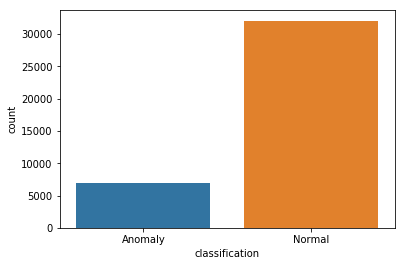

In [20]:
#making Bargraph
sns.countplot(x = 'classification',data = data1)
plt.show()

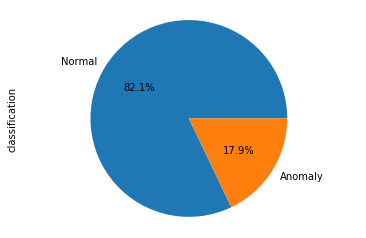

In [21]:
data1['classification'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

In [22]:
x = data.drop(['classification','hash'],axis = 1)

In [23]:
x

,free_area_cache,last_interval,static_prio,static_prio,vm_truncate_count,map_count,nvcsw
0,24,3473,14274,14274,13173,6850,341974
1,24,3473,14274,14274,13173,6850,341974
2,24,3473,14274,14274,13173,6850,341974
3,24,3473,14274,14274,13173,6850,341974
4,24,3473,14274,14274,13173,6850,341974
5,24,3473,14274,14274,13173,6850,341974
6,24,3473,14274,14274,13173,6850,341974
7,24,3473,14274,14274,13173,6850,341974
8,24,3473,14274,14274,13173,6850,341974
9,25,3473,14274,14274,13173,6852,341974


In [24]:
y = data['classification']

In [25]:
y

0        Anomaly
1        Anomaly
2        Anomaly
3        Anomaly
4        Anomaly
5        Anomaly
6        Anomaly
7        Anomaly
8        Anomaly
9        Anomaly
10       Anomaly
11       Anomaly
12       Anomaly
13       Anomaly
14       Anomaly
15       Anomaly
16       Anomaly
17       Anomaly
18       Anomaly
19       Anomaly
20       Anomaly
21       Anomaly
22       Anomaly
23       Anomaly
24       Anomaly
25       Anomaly
26       Anomaly
27       Anomaly
28       Anomaly
29       Anomaly
          ...   
39047     Normal
39048     Normal
39049     Normal
39050     Normal
39051     Normal
39052     Normal
39053     Normal
39054     Normal
39055     Normal
39056     Normal
39057     Normal
39058     Normal
39059     Normal
39060     Normal
39061     Normal
39062     Normal
39063     Normal
39064     Normal
39065     Normal
39066     Normal
39067     Normal
39068     Normal
39069     Normal
39070     Normal
39071     Normal
39072     Normal
39073     Normal
39074     Norm

In [26]:
from sklearn.svm import SVC
def train_test_split(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
model = SVC()
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
pred1 = model.predict(x_test)
pred1

array(['Anomaly', 'Normal', 'Anomaly', ..., 'Anomaly', 'Normal', 'Normal'], dtype=object)

In [32]:
result = pd.DataFrame({
    'Actual Value' : y_test,
    'Predicted Value' : pred1
})
result

,Actual Value,Predicted Value
35714,Anomaly,Anomaly
2977,Normal,Normal
10257,Anomaly,Anomaly
23835,Normal,Normal
11641,Normal,Normal
23875,Normal,Normal
37216,Normal,Normal
31718,Normal,Normal
36782,Anomaly,Anomaly
5382,Anomaly,Anomaly


In [33]:
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct/float(len(testSet)))

accuracy_score(pred1,y_test)

0.97952917093142278

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.iteritems():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

pred = dtc.predict(x_test)
pred

array(['Anomaly', 'Normal', 'Anomaly', ..., 'Anomaly', 'Normal', 'Normal'], dtype=object)

In [29]:
res = pd.DataFrame({
    'Actual Value' : y_test,
    'Predicted Value' : pred
})
res

,Actual Value,Predicted Value
35714,Anomaly,Anomaly
2977,Normal,Normal
10257,Anomaly,Anomaly
23835,Normal,Normal
11641,Normal,Normal
23875,Normal,Normal
37216,Normal,Normal
31718,Normal,Normal
36782,Anomaly,Anomaly
5382,Anomaly,Anomaly


In [30]:
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct/float(len(testSet)))
accuracy_score(pred,y_test)

0.9999147048788809